# LOGISTIC REGRESSION 
## Diabetes Prediction using Logistic Regression with Streamlit Deployment

## Problem Statement

The objective of this assignment is to:

Build a Logistic Regression model to predict diabetes

Perform Exploratory Data Analysis (EDA)

Apply appropriate data preprocessing

Evaluate the model using standard classification metrics

Interpret the model coefficients

Deploy the trained model using Streamlit with an interactive user interface

## Import Required Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

import pickle


## Load Dataset

In [15]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis (EDA)
### Dataset Structure

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Observations:

All features are numerical

Some columns contain zero values which are not medically valid

Dataset is suitable for Logistic Regression

### Target Variable Distribution

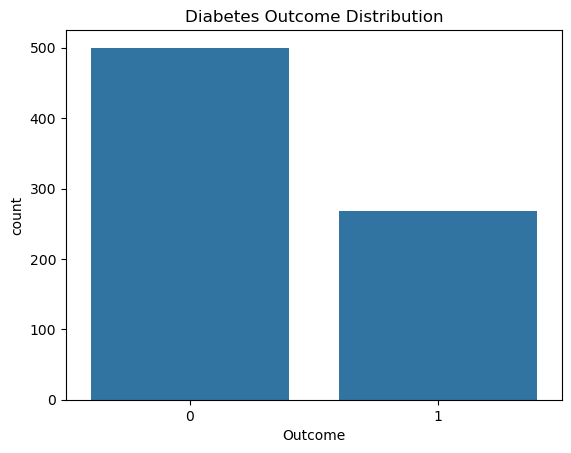

In [24]:
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


### Insight:
The dataset is moderately imbalanced but acceptable for Logistic Regression.

### Feature Distribution

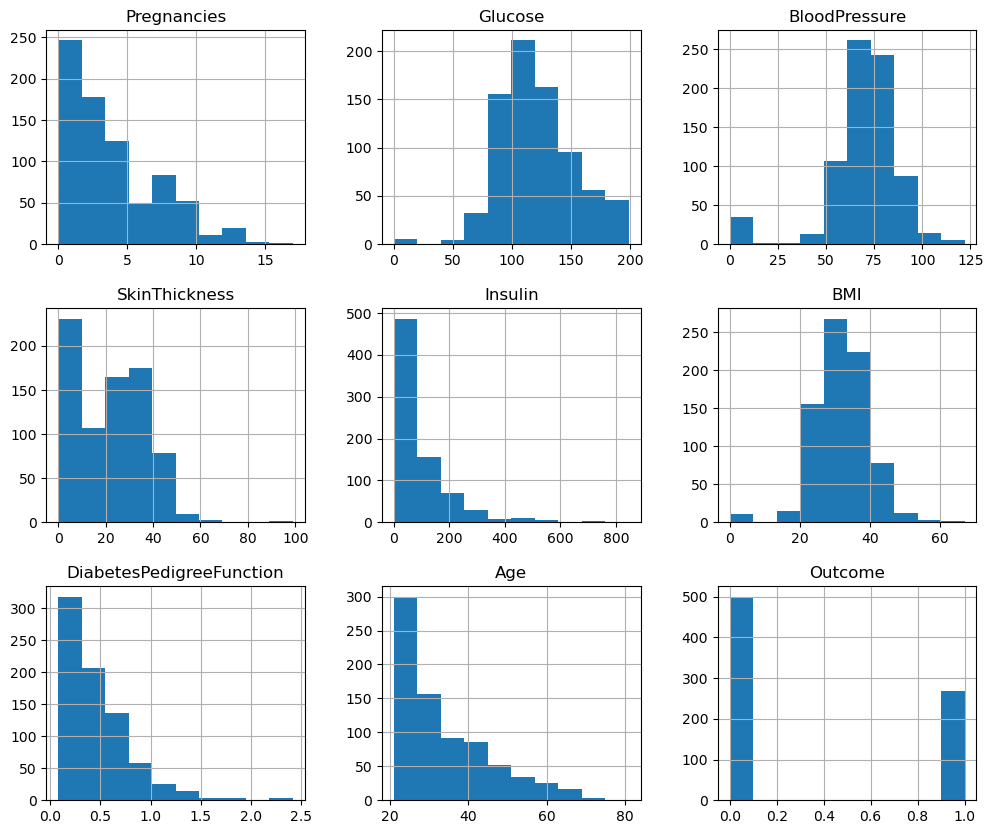

In [29]:
df.hist(figsize=(12, 10))
plt.show()


### Box Plot Analysis

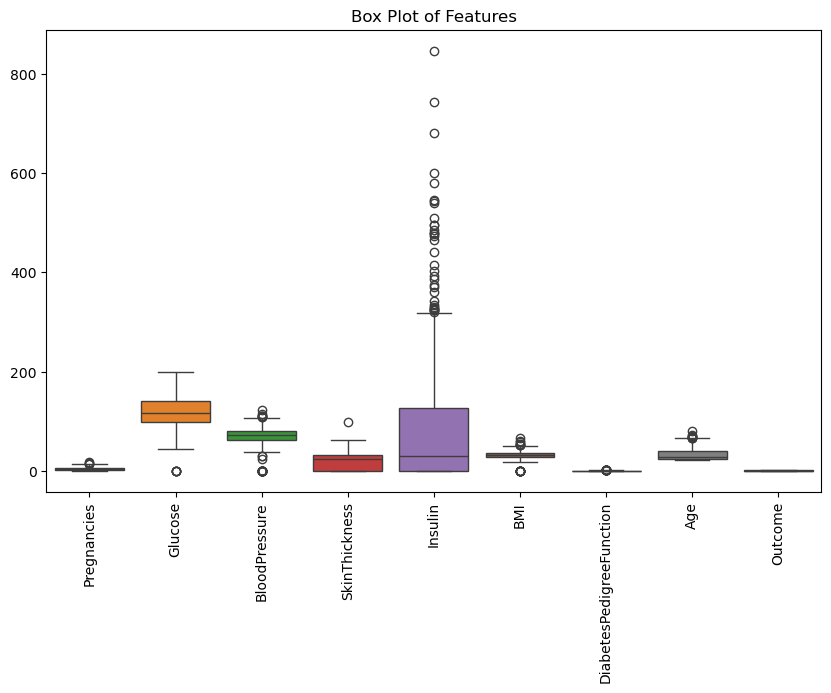

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()


### Insight:

Presence of outliers

Zero values observed in Glucose, BloodPressure, BMI, Insulin

### Correlation Analysis

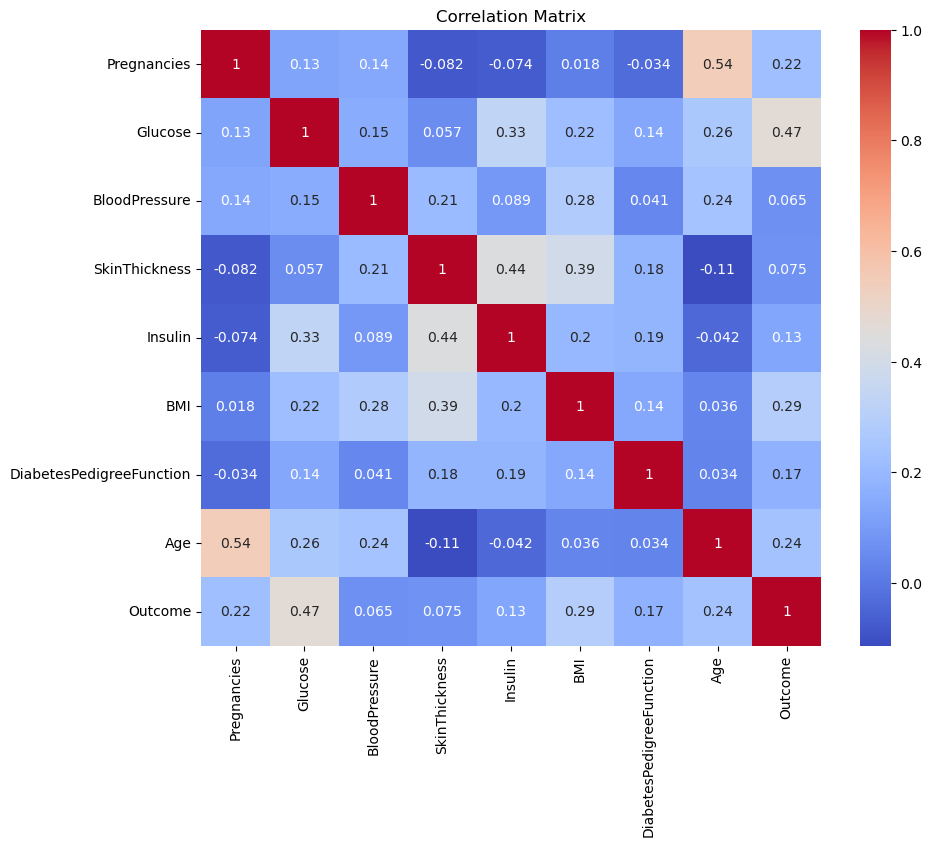

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Observation:

Glucose and BMI show strong correlation with Outcome

## Data Preprocessing
### Handling Missing / Invalid Values

In medical data, zero values are invalid for some features.

In [41]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())


### Feature–Target Separation

In [44]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


## Train–Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Model Building using Pipeline
Using a pipeline ensures consistent preprocessing during training and deployment.

In [51]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

## Model Evaluation
### Predictions

In [54]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]


### Evaluation Metrics

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7662337662337663
Precision: 0.6792452830188679
Recall: 0.6545454545454545
F1-score: 0.6666666666666666
ROC-AUC: 0.8196510560146923


### ROC Curve

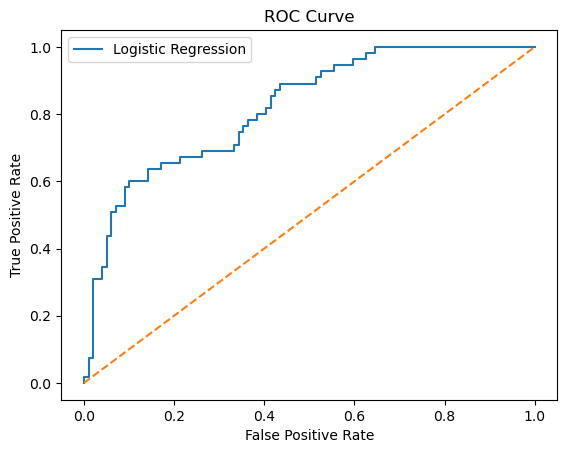

In [60]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Model Interpretation

In [63]:
coefficients = pipeline.named_steps["model"].coef_[0]

pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
})


,Feature,Coefficient
0,Pregnancies,0.218415
1,Glucose,1.138214
2,BloodPressure,-0.165564
3,SkinThickness,0.049443
4,Insulin,-0.224917
5,BMI,0.718367
6,DiabetesPedigreeFunction,0.216745
7,Age,0.378817


### Interpretation:

Positive coefficient → increases probability of diabetes

Glucose, BMI, and Age are strong predictors

## Saving the Trained Model

In [67]:
with open("model.pkl", "wb") as file:
    pickle.dump(pipeline, file)


## Interview Questions
Q1. Difference between Precision and Recall

Precision: Correct positive predictions out of predicted positives

Recall: Correct positive predictions out of actual positives

Q2. What is Cross-Validation?

Evaluates model stability

Reduces overfitting

Improves generalization

## Conclusion

Logistic Regression effectively predicted diabetes

Proper preprocessing improved performance

Pipeline ensured deployment consistency

Streamlit enabled real-time predictions

The assignment satisfies ExcelR evaluation requirements